# Data Mining Clinal Healthcare Data to Predict Heart Failure

### Context

Cardiovascular diseases (CVD's) are the number one cause of death globally taking an estimated 17.9 million lives each year. Four out of five CVD deaths can be attributed to heart attacks and strokes, with one-third of these deaths occur prematurely in individuals under 70 years old. Given that heart failure is known to correlate with common clinical features collected during routine check-ups, machine learning offers a cost-efficient way to screen individuals do determine if their relative risk level.

Authors:
- Gary Bair
- George Garcia
- Luis Perez

### Package Requirements

In [133]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import sklearn
import xgboost as xgb
import graphviz
import os
import random
import imblearn
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier , export_graphviz
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_iris
from sklearn import tree
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import PCA
import multiprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from collections import Counter
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, accuracy_score, recall_score, auc

# Data Importing and Pre-processing

## Dataset Description

This dataset was created by combining datasets already available independently but not previously combined in the UCI Machine Learning Repository. In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset available so far for research purposes. The five datasets used for its curation are:

- Cleveland: 303 observations
- Hungarian: 294 observations
- Switzerland: 123 observations
- Long Beach VA: 200 observations
- Stalog (Heart) Data Set: 270 observations

Total: 1190 observations <br />
Duplicated: 272 observations <br />

Final dataset: 918 observations <br />

Origin: Kaggle <br />
File Type: CSV <br />
File Size: 35.1 kB <br />
Modeling Problem: Classification <br />
Missing Values: No <br />

The individual datasets used to construct the dataset used in this analysis can be referenced using the index of heart disease datasets from UCI Machine Learning Repository which can be found at the following link: https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/

## Attribute Information:
1. Age: age of the patient [years]
2. Sex: sex of the patient [M: Male, F: Female]
3. ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4. RestingBP: resting blood pressure [mm Hg]
5. Cholesterol: serum cholesterol [mm/dl]
6. FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7. RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8. MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9. ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10. Oldpeak: oldpeak = ST [Numeric value measured in depression]
11. ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12. HeartDisease: output class [1: heart disease, 0: Normal]


### Read Dataset and Display Info, 

In [61]:
df= pd.read_csv('heart.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [62]:
df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

### Display Columns

In [63]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


### Dataframe Dimensions

In [64]:
df.shape

(918, 12)

### Missing Data

In [65]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

We observe that there are no missing values in this dataset thus data imputation will not be required.

### Data Statistics

In [66]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


We note that all values exist within plausible ranges. Resting BP can be zero in cases of severe hypertension and FastingBS/HeartDisease are binary variables thus are admissible at this stage of analysis.

### Data Transformation

In [67]:
cat_variables = ['Sex','ChestPainType','FastingBS','RestingECG','ExerciseAngina','ST_Slope']
num_variables = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']

In [68]:
cat_dummies = pd.get_dummies(df[cat_variables])

In [69]:
def mm_normalize(df,col_list):
    temp_df = pd.DataFrame()
    for col in col_list:
        temp_df[col] = (df[col] - df[col].min()) / (df[col].max() - df[col].min())
    return temp_df

In [70]:
num_normed = mm_normalize(df, num_variables)

In [71]:
processed_df = pd.concat([num_normed, cat_dummies],axis = 1)

In [72]:
processed_df.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


# Data Analysis and Visualization

## Identifying Variable Types

### Categorical Features:
- Sex: sex of the patient [M: Male, F: Female] <br />
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic] <br />
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise] <br />
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality, LVH: showing probable or definite left ventricular hypertrophy] <br />
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]<br />
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal] <br />

### Numerical Features:
- Age: age of the patient [years]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- Oldpeak: oldpeak = ST [Numeric value measured in depression]


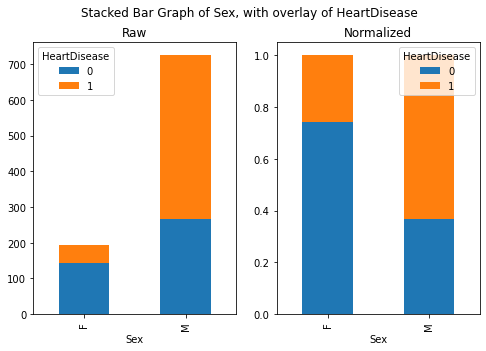

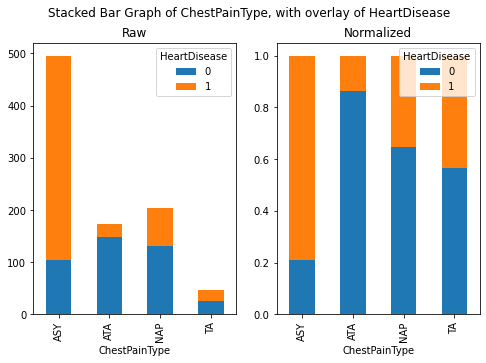

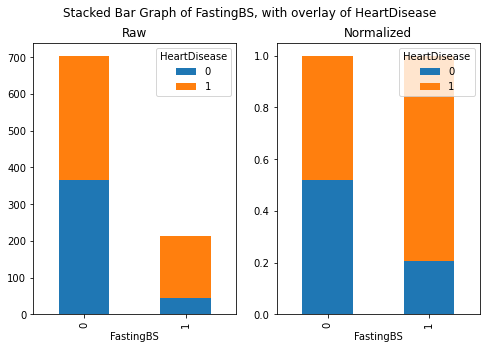

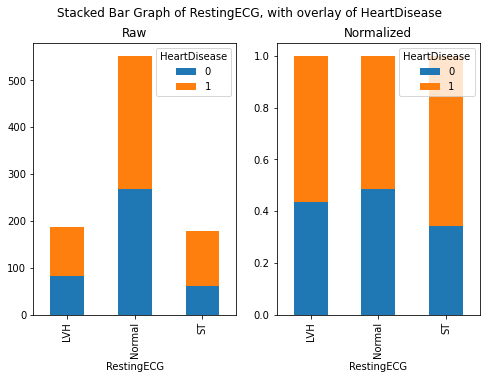

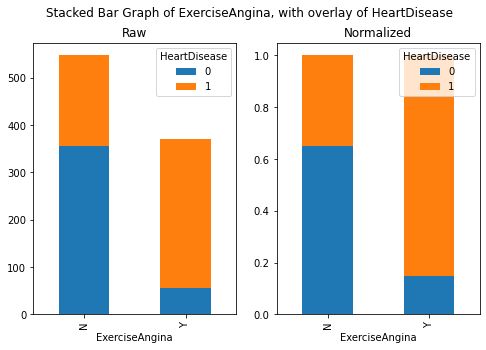

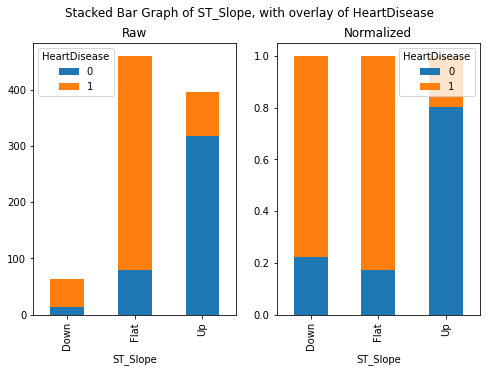

In [73]:
for col in cat_variables:
    crosstab = pd.crosstab(df[col], df['HeartDisease'])
    crosstab_norm = crosstab.div(crosstab.sum(1), axis = 0)
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Stacked Bar Graph of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    crosstab.plot(kind = 'bar', ax = ax1, stacked = True, figsize = (8,5), sort_columns = True)
    ax2.set_title('Normalized')
    crosstab_norm.plot(kind = 'bar', ax = ax2, stacked = True, figsize = (8,5), sort_columns = True)

In [74]:
print('HeartDisease split')
print(df.HeartDisease.value_counts(normalize = True))
print('\n')
for col in cat_variables:
    ct_1 = pd.crosstab(df['HeartDisease'], df[col])
    ct_2 = pd.crosstab(df['HeartDisease'], 
                       df[col],
                       normalize = 'columns')
    print('{} Values'.format(col))
    print(ct_1)
    print('\n')
    print('{} Percentages'.format(col))
    print(ct_2)
    print('\n')

HeartDisease split
1    0.553377
0    0.446623
Name: HeartDisease, dtype: float64


Sex Values
Sex             F    M
HeartDisease          
0             143  267
1              50  458


Sex Percentages
Sex                  F         M
HeartDisease                    
0             0.740933  0.368276
1             0.259067  0.631724


ChestPainType Values
ChestPainType  ASY  ATA  NAP  TA
HeartDisease                    
0              104  149  131  26
1              392   24   72  20


ChestPainType Percentages
ChestPainType       ASY       ATA      NAP        TA
HeartDisease                                        
0              0.209677  0.861272  0.64532  0.565217
1              0.790323  0.138728  0.35468  0.434783


FastingBS Values
FastingBS       0    1
HeartDisease          
0             366   44
1             338  170


FastingBS Percentages
FastingBS            0         1
HeartDisease                    
0             0.519886  0.205607
1             0.480114  0.794393



<ipython-input-75-4b89e19b704e>:13: RuntimeWarning: invalid value encountered in true_divide
  n_norm = np.true_divide(n_table, n_sum)


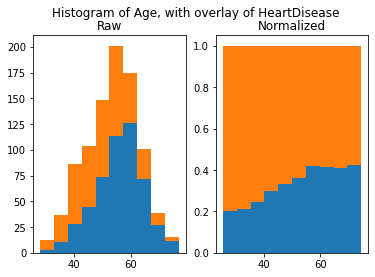

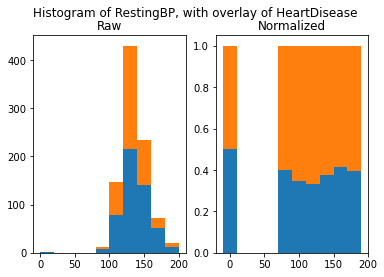

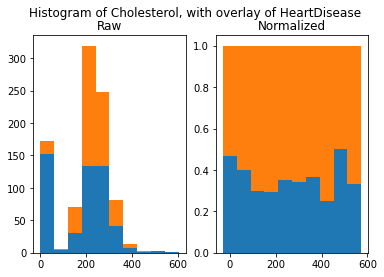

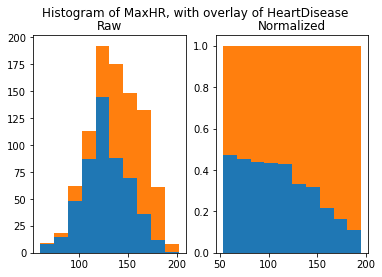

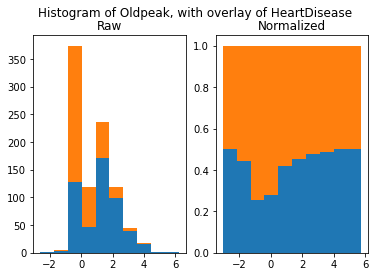

In [75]:
for col in num_variables:
    fig, [ax1, ax2] = plt.subplots(nrows = 1, ncols= 2)
    fig.suptitle('Histogram of {}, with overlay of HeartDisease'.format(col))
    ax1.set_title('Raw')
    ax2.set_title('Normalized')

    y = df[df.HeartDisease == 1][col]
    n = df[df.HeartDisease == 0][col]
    
    n, bins, patches = ax1.hist([y, n], bins = 10, stacked = True)
    n_table = np.column_stack((n[0], n[1]))
    n_sum = n_table.sum(axis=1)[:, None]
    n_norm = np.true_divide(n_table, n_sum)
    ourbins = np.column_stack((bins[0:10], bins[1:11]))
    
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0])
    ax2.bar(x = ourbins[:,0], 
       height = n_norm[:,1], 
       width = ourbins[:, 1] - ourbins[:, 0], 
       bottom = n_norm[:,0])

In [76]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [77]:
df.skew()

Age            -0.195933
RestingBP       0.179839
Cholesterol    -0.610086
FastingBS       1.264484
MaxHR          -0.144359
Oldpeak         1.022872
HeartDisease   -0.215086
dtype: float64

In [78]:
df.groupby('HeartDisease').mean()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
HeartDisease,,,,,,
0,50.551220,130.180488,227.121951,0.107317,148.151220,0.408049
1,55.899606,134.185039,175.940945,0.334646,127.655512,1.274213


## Bivariate Analysis

In [79]:
corr = df.corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612,0.282039
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803,0.107589
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148,-0.232741
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698,0.267291
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691,-0.400421
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000,0.403951
HeartDisease,0.282039,0.107589,-0.232741,0.267291,-0.400421,0.403951,1.000000


<AxesSubplot:>

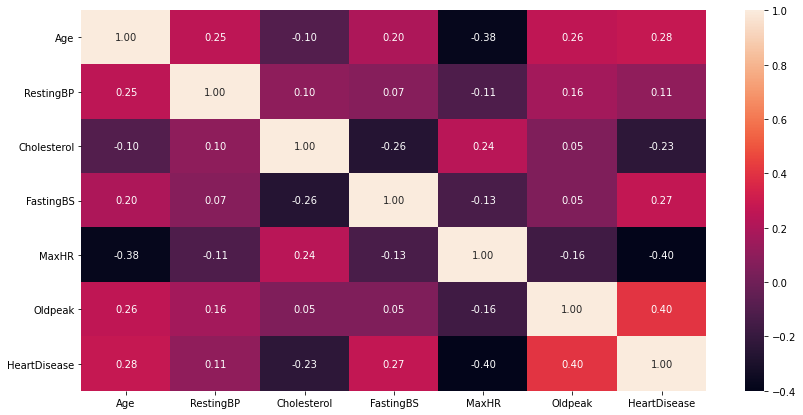

In [80]:
plt.figure(figsize = (14,7))
sns.heatmap(corr, 
            annot = True , 
            fmt = '.2f')

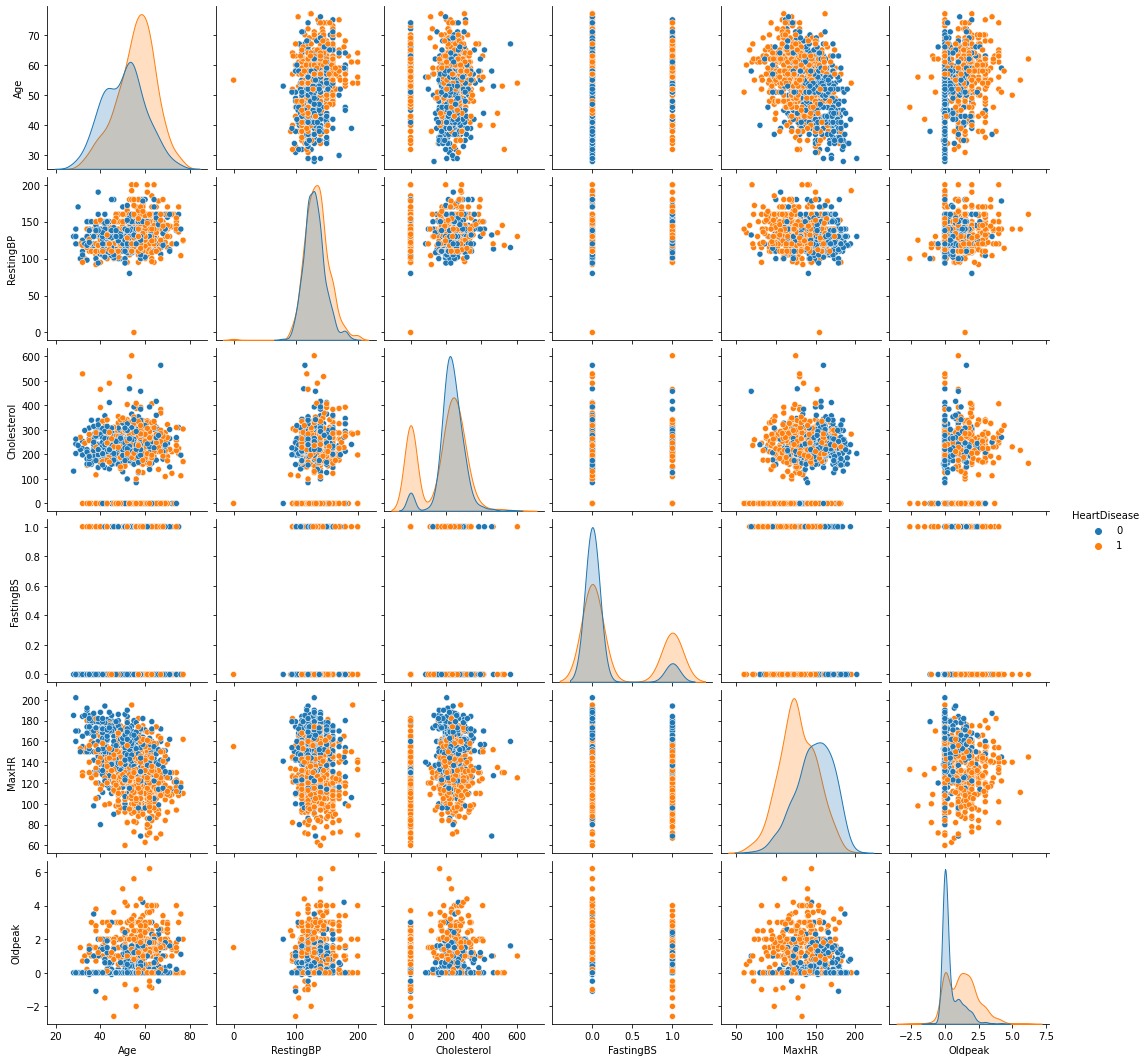

In [81]:
sns.pairplot(df, hue = 'HeartDisease')

# Data Analytics

### Data Partitioning and Balancing

In [111]:
y = df['HeartDisease']
y_names = ['Heart Disease','No Heart Disease']
y.head()

0    0
1    1
2    0
3    1
4    0
Name: HeartDisease, dtype: int64

In [112]:
X = processed_df
X_names =['Age',
          'RestingBP',
          'Cholesterol',
          'MaxHR',
          'Oldpeak',
          'FastingBS',
          'Female', 'Male',
          'ChestPainType_Asymptomatic','ChestPainType_ATA','ChestPainType_TA', 'ChestPainType_NAP',
          'RestingECG_LVH','RestingECG_Normal', 'RestingECG_ST',
          'ExerciseAngina_N','ExerciseAngina_Y',
          'ST_Slope_Down','ST_Slope_Flat','ST_Slope_Up']
X.head()

,Age,RestingBP,Cholesterol,MaxHR,Oldpeak,FastingBS,Sex_F,Sex_M,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ExerciseAngina_N,ExerciseAngina_Y,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.244898,0.70,0.479270,0.788732,0.295455,0,0,1,0,1,0,0,0,1,0,1,0,0,0,1
1,0.428571,0.80,0.298507,0.676056,0.409091,0,1,0,0,0,1,0,0,1,0,1,0,0,1,0
2,0.183673,0.65,0.469320,0.267606,0.295455,0,0,1,0,1,0,0,0,0,1,1,0,0,0,1
3,0.408163,0.69,0.354892,0.338028,0.465909,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0
4,0.530612,0.75,0.323383,0.436620,0.295455,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1


In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.3, 
                                                    random_state=0)

### Resampling

In [114]:
print('Target Feature Counts')
print(y_train.value_counts())

print('Target Feature Distribution')
print(y_train.value_counts(normalize = True))

Target Feature Counts
1    345
0    297
Name: HeartDisease, dtype: int64
Target Feature Distribution
1    0.537383
0    0.462617
Name: HeartDisease, dtype: float64


The default distribution of HeartDisease is observed to be roughly a 54%/46% split.

In [115]:
over_sampler = SMOTE(k_neighbors=2)
X_train_reb, y_train_reb = over_sampler.fit_resample(X_train, y_train)

print('Target Feature Distribution after Rebalancing')
print(y_train_reb.value_counts(normalize = True))

Target Feature Distribution after Rebalancing
0    0.5
1    0.5
Name: HeartDisease, dtype: float64


The training dataset now has a 50%/50% split. The test dataset is unmodified and will remain as such. Due to how SMOTE operates, we must recast y_train_reb to NumPy array.

## Logistic Regression

In [116]:
lr_baseline = LogisticRegression(random_state=0).fit(X_train_reb, y_train_reb)
lr_baseline_y_pred = lr_baseline.predict(X_test)

In [117]:
lr_baseline.coef_

array([[ 0.21807428,  0.7863162 , -1.15517522, -0.91838413,  1.31981003,
         1.25451648, -0.2383237 ,  1.04124961,  1.25188886, -0.74322225,
        -0.36692813,  0.19936018,  0.81326408,  0.51445783,  0.34238762,
        -0.34033977,  0.47646974,  0.68312746,  1.63992796, -0.95242882]])

In [120]:
ct_lr = pd.DataFrame()
ct_lr['Actual'] = y_test
ct_lr['lr_basline'] = lr_baseline_y_pred

lr_baseline_confusion = pd.crosstab(ct_lr['Actual'],
                                    ct_lr['lr_basline'])
lr_baseline_confusion

lr_basline,0,1
Actual,,
0,87,26
1,20,143


## CART Decision Tree

In [121]:
cart_baseline = DecisionTreeClassifier(criterion = "gini", max_leaf_nodes=5).fit(X_train_reb, y_train_reb)
cart_baseline_y_pred = cart_baseline.predict(X_test)

[Text(496.0, 475.65000000000003, 'ST_Slope_Up <= 0.5\ngini = 0.5\nsamples = 690\nvalue = [345, 345]\nclass = Heart Disease'),
 Text(248.0, 339.75, 'MaxHR <= 0.641\ngini = 0.325\nsamples = 377\nvalue = [77, 300]\nclass = No Heart Disease'),
 Text(124.0, 203.85000000000002, 'gini = 0.233\nsamples = 312\nvalue = [42, 270]\nclass = No Heart Disease'),
 Text(372.0, 203.85000000000002, 'gini = 0.497\nsamples = 65\nvalue = [35, 30]\nclass = Heart Disease'),
 Text(744.0, 339.75, 'ChestPainType_Asymptomatic <= 0.5\ngini = 0.246\nsamples = 313\nvalue = [268, 45]\nclass = Heart Disease'),
 Text(620.0, 203.85000000000002, 'gini = 0.087\nsamples = 219\nvalue = [209, 10]\nclass = Heart Disease'),
 Text(868.0, 203.85000000000002, 'ExerciseAngina_Y <= 0.5\ngini = 0.467\nsamples = 94\nvalue = [59, 35]\nclass = Heart Disease'),
 Text(744.0, 67.94999999999999, 'gini = 0.351\nsamples = 66\nvalue = [51, 15]\nclass = Heart Disease'),
 Text(992.0, 67.94999999999999, 'gini = 0.408\nsamples = 28\nvalue = [8, 2

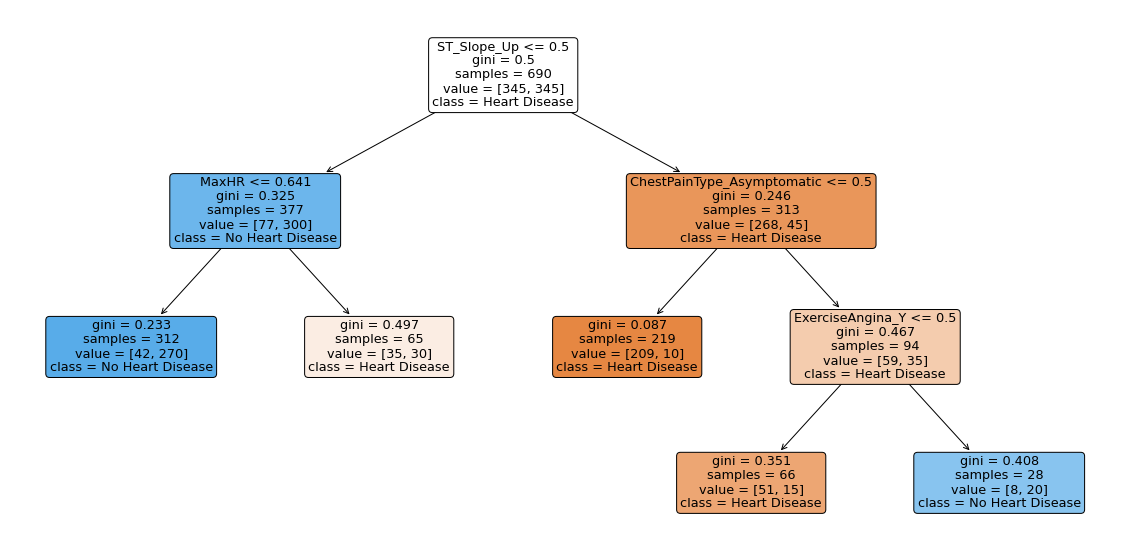

In [122]:
plt.figure(figsize=(20,10))
tree.plot_tree(cart_baseline, 
               filled = True,
               rounded =True, 
               class_names = y_names,
               feature_names = X_names)

In [124]:
ct_cart = pd.DataFrame()
ct_cart['Actual'] = y_test
ct_cart['cart_basline'] = cart_baseline_y_pred

cart_baseline_confusion = pd.crosstab(ct_cart['Actual'],
                                      ct_cart['cart_basline'])
cart_baseline_confusion

cart_basline,0,1
Actual,,
0,90,23
1,39,124


## XGBoost

In [131]:
xgb_baseline = xgb.XGBClassifier(random_state = 0, use_label_encoder = False).fit(X_train_reb, y_train_reb)
xgb_baseline_y_pred = xgb_baseline.predict(X_test)

[23:24:58] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [132]:
ct_xgb = pd.DataFrame()
ct_xgb['Actual'] = y_test
ct_xgb['xgb_basline'] = xgb_baseline_y_pred

xgb_baseline_confusion = pd.crosstab(ct_xgb['Actual'],
                                     ct_xgb['xgb_basline'])
xgb_baseline_confusion

xgb_basline,0,1
Actual,,
0,92,21
1,20,143


In [140]:
xgb_model = xgb.XGBClassifier(random_state = 0, 
                              use_label_encoder = False,
                              n_jobs=multiprocessing.cpu_count() // 2)
xgb_v1 = GridSearchCV(xgb_model,
                      {'max_depth': [2, 4, 6], 
                       'n_estimators': [50, 100, 200]}, 
                      verbose=1,
                      n_jobs=2)
xgb_v1_y_pred = xgb_v1.fit(X_train_reb, y_train_reb)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[23:36:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [141]:
xgb_v1_y_pred = xgb_v1.predict(X_test)

In [142]:
ct_xgb['xgb_v1'] = xgb_v1_y_pred

xgb_v1_confusion = pd.crosstab(ct_xgb['Actual'],
                               ct_xgb['xgb_v1'])
xgb_v1_confusion

xgb_v1,0,1
Actual,,
0,90,23
1,21,142


## Model Evaluation